In [1189]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib inline


# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

datafile = "/Users/justinpassek/Downloads/home-values/single_family_home_values.csv"
df = pd.read_csv(datafile)

print(df)

              id                    address    city state  zipcode   latitude  \
0       39525749            8171 E 84th Ave  Denver    CO    80022  39.849160   
1      184578398          10556 Wheeling St  Denver    CO    80022  39.888020   
2      184430015        3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
3      155129946        3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
4         245107            5615 S Eaton St  Denver    CO    80123  39.616181   
...          ...                        ...     ...   ...      ...        ...   
14995   51411356              802 S High St  Denver    CO    80209  39.701902   
14996   21721153           214 S Lincoln St  Denver    CO    80209  39.712608   
14997   12995320              870 S Race St  Denver    CO    80209  39.700736   
14998   39611615         130 S Lafayette St  Denver    CO    80209  39.714088   
14999   42961679  100 S University Blvd # 1  Denver    CO    80209  39.714399   

        longitude  bedrooms

In [1190]:
df['estimated_value'].describe()

#df.sort_values(by=['estimated_value'], ascending=False)

count    1.500000e+04
mean     6.371625e+05
std      5.044185e+05
min      1.477670e+05
25%      3.984348e+05
50%      5.183575e+05
75%      6.879692e+05
max      1.014531e+07
Name: estimated_value, dtype: float64

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
0,39525749,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,75000,165700.0,239753
1,184578398,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,216935,NaN,343963
2,184430015,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,330000,NaN,488840
3,155129946,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,185000,0.0,494073
4,245107,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,308000,0.0,513676


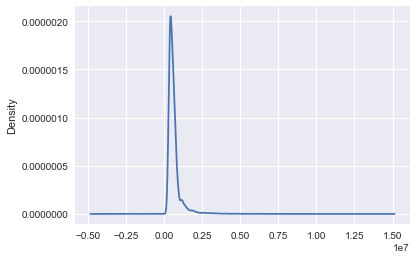

In [1191]:
df['estimated_value'].plot(kind='kde')

data_corr = df.select_dtypes(include=[np.number])
data_corr.head()

In [1192]:
corr = data_corr.corr()
corr.head(20)
corr.sort_values(['estimated_value'], ascending=False, inplace=True)
corr['estimated_value']

estimated_value    1.000000
squareFootage      0.824506
bathrooms          0.715926
priorSaleAmount    0.590177
rooms              0.581023
lotSize            0.456539
lastSaleAmount     0.418460
bedrooms           0.369125
yearBuilt          0.174430
id                 0.126193
longitude          0.121984
zipcode            0.089104
latitude          -0.266116
Name: estimated_value, dtype: float64

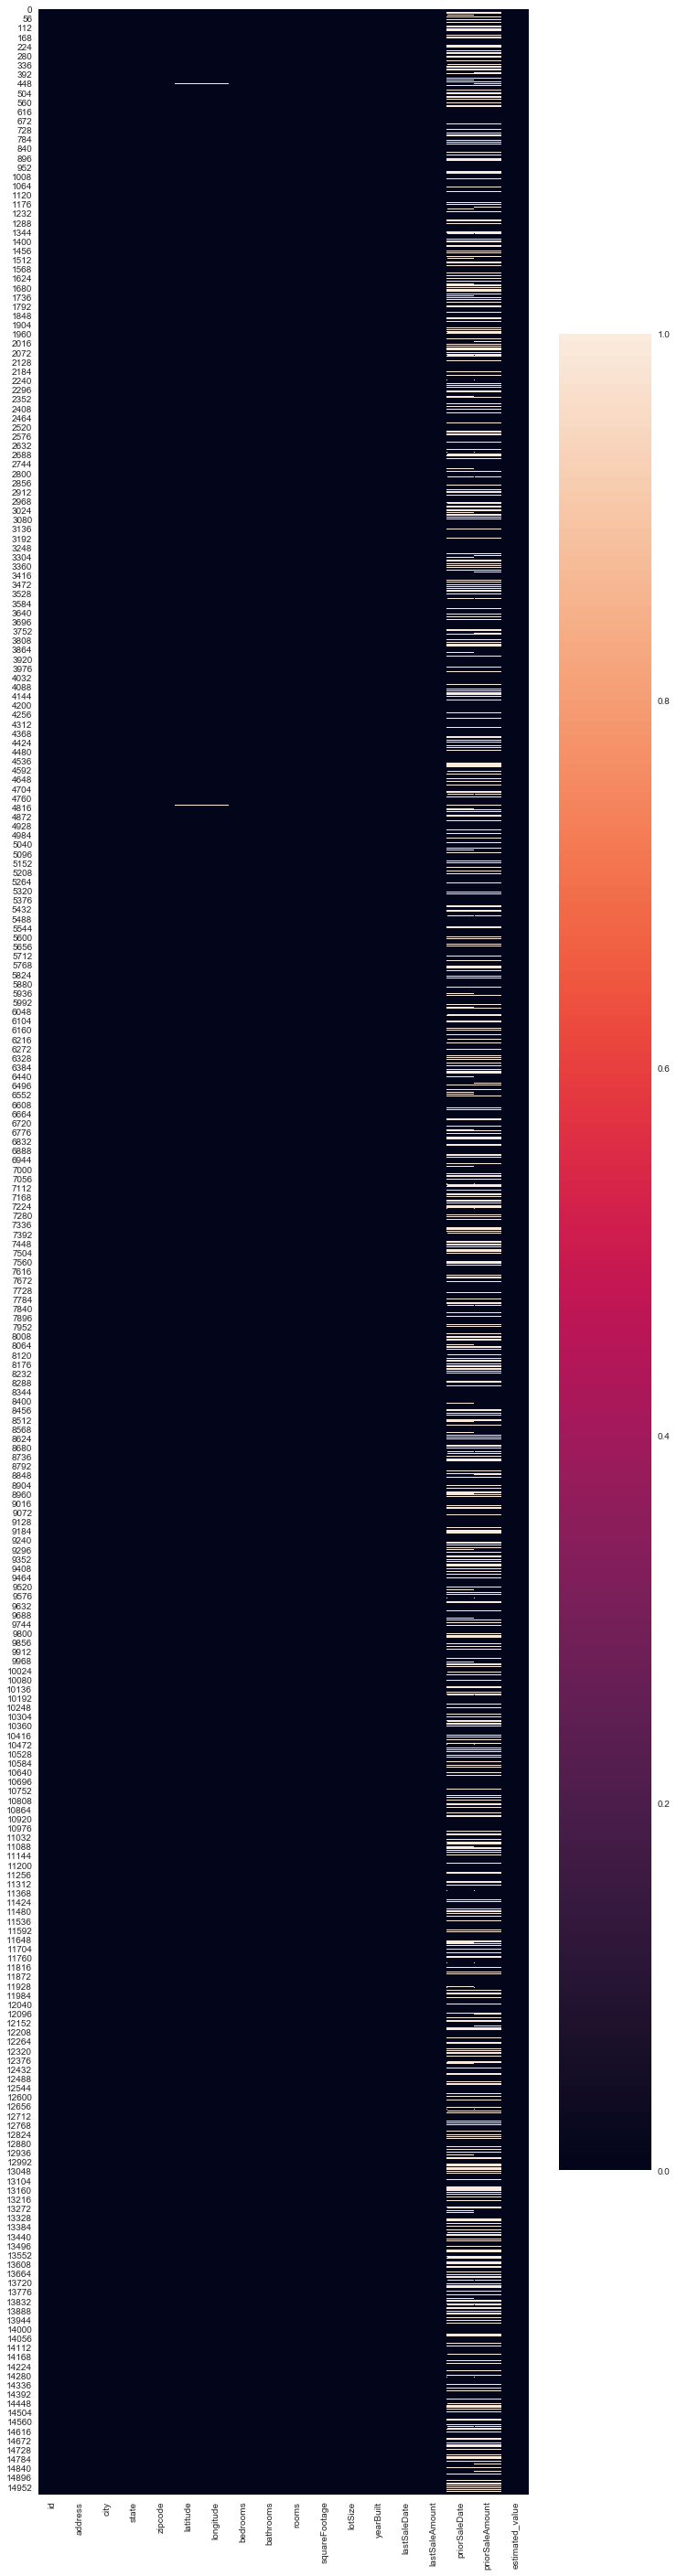

In [1193]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 50))
sns.heatmap(df.isnull())
plt.show()

In [1194]:
df['lastSaleAmount'] = df['lastSaleAmount'].fillna(0)
df['priorSaleAmount'] = df['priorSaleAmount'].fillna(0)

df['no_last_sale_record'] = np.where(df['lastSaleAmount']<1, '1', '0')
df['no_prior_sale_record'] = np.where(df['priorSaleAmount']<1, '1', '0')

df['Yes_last_sale_record'] = np.where(df['lastSaleAmount']==0, '0', '1')
df['Yes_prior_sale_record'] = np.where(df['priorSaleAmount']==0, '0', '1')

df['year_prior_sale'] = pd.to_datetime(df['priorSaleDate']).dt.year
df['year_last_sale'] = pd.to_datetime(df['lastSaleDate']).dt.year


df = df[(df['estimated_value'] < 10000000)]

print(df)

              id                    address    city state  zipcode   latitude  \
0       39525749            8171 E 84th Ave  Denver    CO    80022  39.849160   
1      184578398          10556 Wheeling St  Denver    CO    80022  39.888020   
2      184430015        3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
3      155129946        3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
4         245107            5615 S Eaton St  Denver    CO    80123  39.616181   
...          ...                        ...     ...   ...      ...        ...   
14995   51411356              802 S High St  Denver    CO    80209  39.701902   
14996   21721153           214 S Lincoln St  Denver    CO    80209  39.712608   
14997   12995320              870 S Race St  Denver    CO    80209  39.700736   
14998   39611615         130 S Lafayette St  Denver    CO    80209  39.714088   
14999   42961679  100 S University Blvd # 1  Denver    CO    80209  39.714399   

        longitude  bedrooms

In [1196]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)
print(df)
# Variable with the Longitude and Latitude
X=df.loc[:,['id','latitude','longitude']]
X.head(10)

              id                    address    city state  zipcode   latitude  \
0       39525749            8171 E 84th Ave  Denver    CO    80022  39.849160   
1      184578398          10556 Wheeling St  Denver    CO    80022  39.888020   
2      184430015        3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
3      155129946        3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
4         245107            5615 S Eaton St  Denver    CO    80123  39.616181   
...          ...                        ...     ...   ...      ...        ...   
14995   51411356              802 S High St  Denver    CO    80209  39.701902   
14996   21721153           214 S Lincoln St  Denver    CO    80209  39.712608   
14997   12995320              870 S Race St  Denver    CO    80209  39.700736   
14998   39611615         130 S Lafayette St  Denver    CO    80209  39.714088   
14999   42961679  100 S University Blvd # 1  Denver    CO    80209  39.714399   

        longitude  bedrooms

,id,latitude,longitude
0,39525749,39.849160,-104.893468
1,184578398,39.888020,-104.830930
2,184430015,39.761710,-105.081070
3,155129946,39.760780,-105.081060
4,245107,39.616181,-105.058812
5,3523925,39.615136,-105.069018
6,30560679,39.616350,-105.070760
7,39623928,39.615213,-105.070617
8,148975825,39.620158,-105.063094
9,184623176,39.626770,-105.081990


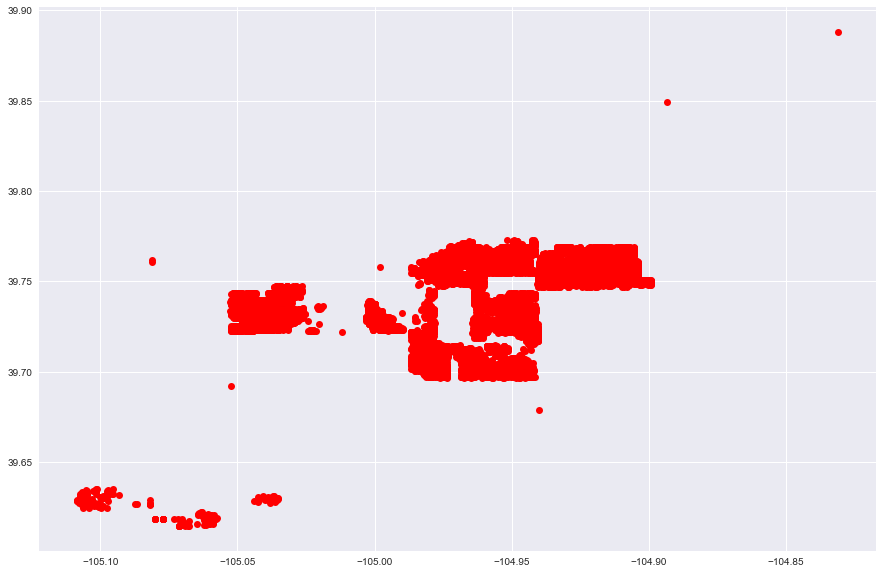

In [1167]:
#import matplotlib.pyplot as plt
#import matplotlib
#import itertools

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15)

fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('ggplot')
plt.plot(df.longitude, df.latitude, 'ro')

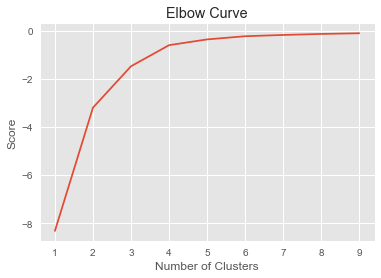

In [1168]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [1169]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['latlon_cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
print(X)

              id   latitude   longitude  latlon_cluster_label
0       39525749  39.849160 -104.893468                     6
1      184578398  39.888020 -104.830930                     6
2      184430015  39.761710 -105.081070                     2
3      155129946  39.760780 -105.081060                     2
4         245107  39.616181 -105.058812                     3
...          ...        ...         ...                   ...
14995   51411356  39.701902 -104.964871                     7
14996   21721153  39.712608 -104.986000                     0
14997   12995320  39.700736 -104.963707                     7
14998   39611615  39.714088 -104.970701                     0
14999   42961679  39.714399 -104.958955                     7

[14985 rows x 4 columns]


In [1170]:
df = pd.merge(df, X, on='id')

In [1171]:
df['yearBuilt'] = df.groupby('latlon_cluster_label')['yearBuilt'].transform(lambda x: x.fillna(x.median()))

In [1172]:
df['lastSaleAmount'] = df.groupby([
    'latlon_cluster_label',
    'year_last_sale'
    ,'bedrooms'
])['lastSaleAmount'].transform(lambda x: x.fillna(x.median()))

In [1173]:
df['PpSqFt'] = df['estimated_value'] / df['squareFootage']
df['PpSqFt'] = df.groupby('latlon_cluster_label')['PpSqFt'].transform(lambda x: x.median())

df.head()
print(df)

              id                    address    city state  zipcode  \
0       39525749            8171 E 84th Ave  Denver    CO    80022   
1      184578398          10556 Wheeling St  Denver    CO    80022   
2      184430015        3190 Wadsworth Blvd  Denver    CO    80033   
3      155129946        3040 Wadsworth Blvd  Denver    CO    80033   
4         245107            5615 S Eaton St  Denver    CO    80123   
...          ...                        ...     ...   ...      ...   
14979   51411356              802 S High St  Denver    CO    80209   
14980   21721153           214 S Lincoln St  Denver    CO    80209   
14981   12995320              870 S Race St  Denver    CO    80209   
14982   39611615         130 S Lafayette St  Denver    CO    80209   
14983   42961679  100 S University Blvd # 1  Denver    CO    80209   

       latitude_x  longitude_x  bedrooms  bathrooms  rooms  ...  \
0       39.849160  -104.893468         3        2.0      6  ...   
1       39.888020  -104.8

In [1174]:
df['lastSale_mean_by_year'] = df.groupby(['year_last_sale',
                                          'latlon_cluster_label']
                                        )['lastSaleAmount'].transform(lambda x: x.fillna(x.mean()))

In [1175]:
df['Neigh_Year_lastSale_PpSqFt'] = df['lastSale_mean_by_year'] / df['squareFootage']

In [1176]:
df['lastSale_PpSqFt'] = df['lastSaleAmount'] / df['squareFootage']

df['lastSale_above_market'] = np.where(
    df['lastSale_PpSqFt'] - df['Neigh_Year_lastSale_PpSqFt']>0,
    '1',
    '0'
)

In [1177]:
df.head()

,id,address,city,state,zipcode,latitude_x,longitude_x,bedrooms,bathrooms,rooms,...,year_prior_sale,year_last_sale,latitude_y,longitude_y,latlon_cluster_label,PpSqFt,lastSale_mean_by_year,Neigh_Year_lastSale_PpSqFt,lastSale_PpSqFt,lastSale_above_market
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,...,2004.0,2009,39.849160,-104.893468,6,408.210198,75000,54.426705,54.426705,0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,...,NaN,2004,39.888020,-104.830930,6,408.210198,216935,131.237145,131.237145,0
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,...,NaN,2008,39.761710,-105.081070,2,351.222172,330000,175.345377,175.345377,0
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,...,2008.0,2008,39.760780,-105.081060,2,351.222172,185000,77.083333,77.083333,0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,...,2011.0,2012,39.616181,-105.058812,3,250.802475,308000,133.622560,133.622560,0


In [1178]:
df = df.drop(['id',
              'address',
              'city',
              'state',
              'latitude_x',
              'longitude_x',
              'latitude_y',
              'longitude_y',
              'lastSaleDate',
#              'lastSaleAmount',
              'priorSaleDate',
              'priorSaleAmount',
#              'yearBuilt',
              'no_last_sale_record',
              'no_prior_sale_record',
              'Yes_last_sale_record',
              'Yes_prior_sale_record',
              'year_prior_sale',
              'year_last_sale',
              'PpSqFt',
              'lastSale_mean_by_year',
              'Neigh_Year_lastSale_PpSqFt'
#             , 'lastSale_above_market_0'
#              ,'lastSale_PpSqFt'
#              ,'bedrooms'
#              ,'rooms'
             ], axis = 1)

#df = df.fillna(0)

print(df)

       zipcode  bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0        80022         3        2.0      6           1378     9968     2003.0   
1        80022         2        2.0      6           1653     6970     2004.0   
2        80033         3        1.0      0           1882    23875     1917.0   
3        80033         4        3.0      0           2400    11500     1956.0   
4        80123         3        4.0      8           2305     5600     1998.0   
...        ...       ...        ...    ...            ...      ...        ...   
14979    80209         4        4.0      8           2169     4950     1922.0   
14980    80209         3        3.0     11           2937     4500     1890.0   
14981    80209         3        5.0      7           2937     4680     2007.0   
14982    80209         3        4.0     10           3193     4970     2005.0   
14983    80209         3        5.0      9           3193     4364     2001.0   

       lastSaleAmount  esti

In [1179]:
#Scale Continuous Features
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

scaled_features = df.copy()
col_names = [
             'bedrooms', 
             'bathrooms',
             'rooms',
             'squareFootage',
             'lotSize',
             'yearBuilt',
             'lastSaleAmount',
             'lastSale_PpSqFt'
            ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
df = scaled_features
df.head()

#remove outliers
from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [1180]:
# One-hot encode categorical features
# label encoding the data 

df['zipcode'] = df['zipcode'].astype(object)
df['latlon_cluster_label'] = df['latlon_cluster_label'].astype(object)
df['lastSale_above_market'] = df['lastSale_above_market'].astype(object)

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

df = encode_and_bind(df, 'zipcode')
df = encode_and_bind(df, 'latlon_cluster_label')
df = encode_and_bind(df, 'lastSale_above_market')

df.head()
print(df)

       bedrooms  bathrooms     rooms  squareFootage   lotSize  yearBuilt  \
0      0.325895  -0.166690 -0.083185      -0.163571  1.380268   2.459708   
1     -0.789758  -0.166690 -0.083185       0.168224  0.382732   2.493168   
2      0.325895  -1.025886 -3.150737       0.444519  6.007597  -0.417816   
3      1.441548   0.692506 -3.150737       1.069500  1.890017   0.887108   
4      0.325895   1.551702  0.939332       0.954880 -0.073113   2.292410   
...         ...        ...       ...            ...       ...        ...   
14979  1.441548   1.551702  0.939332       0.790792 -0.289390  -0.250518   
14980  0.325895   0.692506  2.473108       1.717405 -0.439120  -1.321225   
14981  0.325895   2.410899  0.428073       1.717405 -0.379228   2.593546   
14982  0.325895   1.551702  1.961849       2.026276 -0.282735   2.526627   
14983  0.325895   2.410899  1.450591       2.026276 -0.484372   2.392789   

       lastSaleAmount  estimated_value  lastSale_PpSqFt  zipcode_80022  ...  \
0       

In [1181]:
X = df.drop('estimated_value', axis = 1)
y = df['estimated_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()
y_train.head()

13964    648421
8031     465076
3078     230972
14211    639602
12749    360431
Name: estimated_value, dtype: int64

In [1182]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [1183]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-6.837452e+04
bathrooms,6.682513e+04
rooms,-2.006997e+04
squareFootage,2.698200e+05
lotSize,8.225263e+04
yearBuilt,2.185200e+04
lastSaleAmount,2.396712e+05
lastSale_PpSqFt,-1.924512e+05
zipcode_80022,8.042348e+04
zipcode_80033,-5.836963e+05


In [1184]:
y_pred = lm.predict(X_test)

In [1185]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1
df

df.sort_values(by=['Actual'], ascending=False)

,Actual,Predicted
13426,6538208,6.455698e+06
7749,5740811,3.684056e+06
7175,5613580,3.340153e+06
7055,5204393,5.199443e+06
8413,4826309,3.041067e+06
...,...,...
2795,229491,2.262684e+05
2805,222605,1.205456e+05
1269,221404,1.659829e+05
2536,220948,2.539471e+05


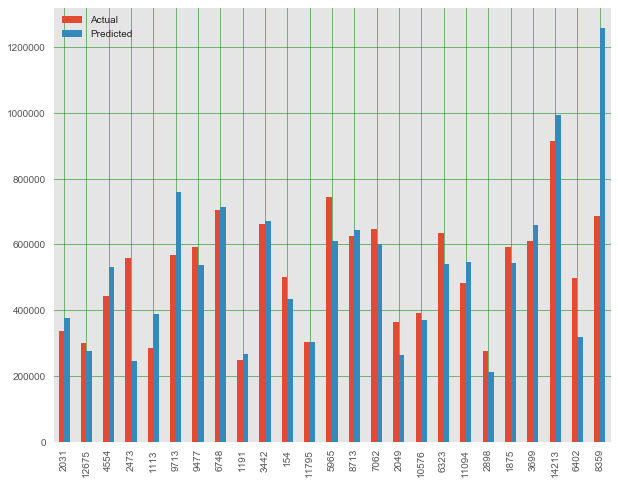

In [1186]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

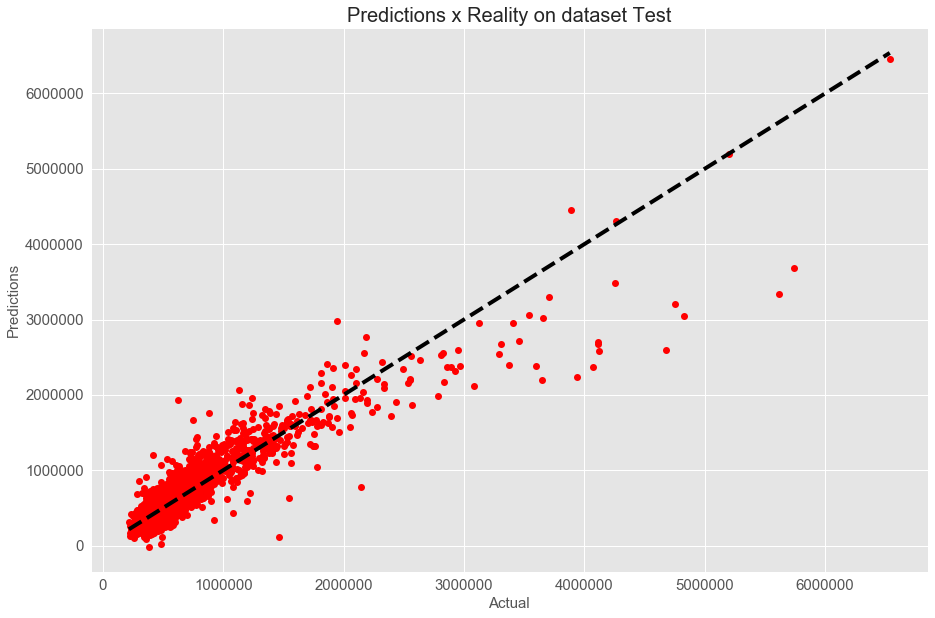

In [1187]:
predictions = df

import matplotlib.pyplot as plt
import matplotlib
import itertools

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('ggplot')
plt.plot(predictions.Actual, predictions.Predicted, 'ro')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.title('Predictions x Reality on dataset Test', fontsize = 20)
ax.plot([df.Actual.min(), df.Actual.max()], [df.Actual.min(), df.Actual.max()], 'k--', lw=4)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [1188]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score:', lm.score(X_test, y_test))

Mean Absolute Error: 116003.6941767842
Mean Squared Error: 38314817490.13555
Root Mean Squared Error: 195741.7111658513
R Squared Score: 0.8406134052702284
